In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd

#한글 폰트 사용
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt

#폰트 경로
#font_path = "C:/Windows/Fonts/H2GTRM.TTF"

#폰트 이름 얻어오기
#font_name = font_manager.FontProperties(fname=font_path).get_name()

#font 설정
#matplotlib.rc('font',family=font_name)

In [4]:
import os
os.getcwd()

'/content'

In [5]:
os.chdir('/content/drive/MyDrive/betabrain/selecto')
mis1 = pd.read_excel("./MIS/MIS01.xlsx")
file_list = ["MIS0"+str(i)+".xlsx" for i in range(1,10)]
print(file_list)

['MIS01.xlsx', 'MIS02.xlsx', 'MIS03.xlsx', 'MIS04.xlsx', 'MIS05.xlsx', 'MIS06.xlsx', 'MIS07.xlsx', 'MIS08.xlsx', 'MIS09.xlsx']


In [6]:
file_list = ["MIS0"+str(i)+".xlsx" for i in range(1,10)]
#mis1 = pd.read_excel("./MIS/MIS0"+str(1)+".xlsx")
mis = []
for i in range(len(file_list)):
  mis.append(pd.read_excel("./MIS/"+ file_list[i]))

In [7]:
for i in range(len(mis)):
  print(mis[i].shape)
  mis[i]["month"] = i + 1

(241, 66)
(240, 63)
(240, 67)
(240, 66)
(239, 67)
(238, 66)
(238, 59)
(239, 59)
(232, 58)


In [8]:
df_mis = pd.concat(mis)


In [9]:
mis[0].columns

Index([             'no.',          '매장명(변경)',               '구분',
                     '코드',               'SV',              '지역1',
                    '지역2',               '상권',            'IS/RS',
                     '형태',             '오픈일자',            '기존/신규',
                   '휴무주기',                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                 17,
                       18,                 19,                 20,
                       21,                 22,                 23,
                       24,                 25,                 26,
                       27,                 28,                 29,
                       30,                 31,            '배달의

In [ ]:
fis = pd.read_excel(r"C:\Users\USER\Desktop\betabrain\MIS\FIS.xlsx")

In [10]:
#x = df_mis.groupby(['지역1','month']).size().to_frame()

In [11]:
df_reg = df_mis.groupby(['지역1','month']).size()

In [12]:
df_reg = df_reg.reset_index()
df_reg = df_reg.rename(columns={0: "cnt"})

In [ ]:
df_reg

In [14]:

df_reg_wide = pd.pivot(df_reg, index=['지역1'], columns = 'month',values = 'cnt') 

In [15]:
df_reg_wide.reset_index(drop=False).columns

Index(['지역1', 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='object', name='month')

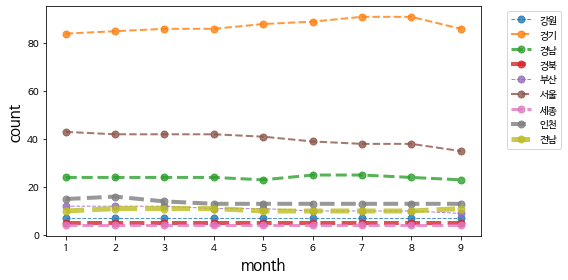

<Figure size 432x288 with 0 Axes>

In [28]:
plt.rc('font', family='NanumBarunGothic') 
fig = plt.figure(figsize=(8,4)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
groups = df_reg['지역1'].unique()
linewidths = [1, 2, 3, 4,1,2,3,4,5]
for group_name, size in zip(groups, linewidths):
    # subsetting
    #print(group_name)
    df_reg_sub = df_reg[df_reg['지역1'] == group_name]
    # plotting
    plt.plot(df_reg_sub.month, df_reg_sub.cnt, linewidth=size, 
             linestyle="--", label=group_name, marker='o', markersize=7, alpha=0.8)

plt.xlabel('month', fontsize=15)
plt.ylabel('count', fontsize=15) 
#plt.title('지역 별 매장 수 추이',fontsize=20) ## 타이틀 설정
lg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('example.png', 
            dpi=300, 
            format='png', 
            bbox_extra_artists=(lg,), 
            bbox_inches='tight')

#################지역 별 매장 수####################

In [ ]:
location = pd.DataFrame(
    {'2022/01/01':mis1.groupby('지역1').size(),
    '2022/02/01':mis2.groupby('지역1').size(),
    '2022/03/01':mis3.groupby('지역1').size(),
    '2022/04/01':mis4.groupby('지역1').size(),
    '2022/05/01':mis5.groupby('지역1').size(),
    '2022/06/01':mis6.groupby('지역1').size(),
    '2022/07/01':mis7.groupby('지역1').size(),
    '2022/08/01':mis8.groupby('지역1').size(),
    '2022/09/01':mis9.groupby('지역1').size()})

location_t = location.T
location_t = location_t.reset_index()

location_t

지역1,index,강원,경기,경남,경북,부산,서울,세종,인천,전남,전북,제주,충남,충북
0,2022/01/01,7,84,24,5,12,43,4,15,10,9,1,19,2
1,2022/02/01,7,85,24,5,12,42,4,16,11,9,1,19,2
2,2022/03/01,7,86,24,5,12,42,4,14,11,9,1,20,2
3,2022/04/01,7,86,24,5,11,42,4,13,11,9,1,22,2
4,2022/05/01,7,88,23,5,11,41,4,13,10,9,2,22,2
5,2022/06/01,7,89,25,5,10,39,4,13,10,9,2,22,2
6,2022/07/01,7,91,25,5,10,38,4,13,10,9,2,22,2
7,2022/08/01,7,91,24,5,10,38,4,13,10,9,2,22,2
8,2022/09/01,7,86,23,5,9,35,4,13,11,9,2,22,2


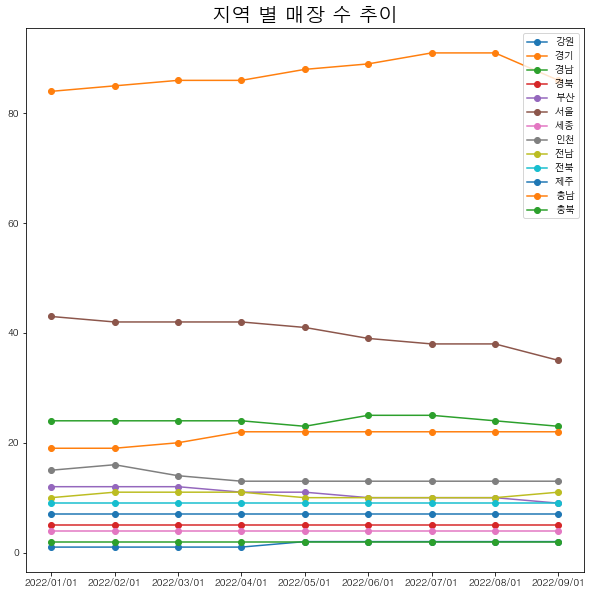

In [ ]:

x = location_t['index']
y1 = location_t['강원']
y2 = location_t['경기']
y3 = location_t['경남']
y4 = location_t['경북']
y5 = location_t['부산']
y6 = location_t['서울']
y7 = location_t['세종']
y8 = location_t['인천']
y9 = location_t['전남']
y10 = location_t['전북']
y11 = location_t['제주']
y12 = location_t['충남']
y13 = location_t['충북']


fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

## 선그래프 생성
ax.plot(x,y1,marker='o',label='강원') 
ax.plot(x,y2,marker='o',label='경기') 
ax.plot(x,y3,marker='o',label='경남')
ax.plot(x,y4,marker='o',label='경북')
ax.plot(x,y5,marker='o',label='부산')
ax.plot(x,y6,marker='o',label='서울')
ax.plot(x,y7,marker='o',label='세종')
ax.plot(x,y8,marker='o',label='인천')
ax.plot(x,y9,marker='o',label='전남')
ax.plot(x,y10,marker='o',label='전북')
ax.plot(x,y11,marker='o',label='제주')
ax.plot(x,y12,marker='o',label='충남')
ax.plot(x,y13,marker='o',label='충북')

 
ax.legend() ## 범례
 
plt.title('지역 별 매장 수 추이',fontsize=20) ## 타이틀 설정
plt.show()

#################상권 유형 별 매장 수####################

In [ ]:
market = pd.DataFrame(
    {'2022/01/01':mis1.groupby('상권').size(),
    '2022/02/01':mis2.groupby('상권').size(),
    '2022/03/01':mis3.groupby('상권').size(),
    '2022/04/01':mis4.groupby('상권').size(),
    '2022/05/01':mis5.groupby('상권').size(),
    '2022/06/01':mis6.groupby('상권').size(),
    '2022/07/01':mis7.groupby('상권').size(),
    '2022/08/01':mis8.groupby('상권').size(),
    '2022/09/01':mis9.groupby('상권').size()})

market_t = market.T
market_t = market_t.reset_index()
market_t = market_t.fillna(0)
market_t

,index,상업,오피스,유흥/주거,주거,특수,학원,학원가
0,2022/01/01,66.0,22.0,0.0,131.0,12.0,4.0,0.0
1,2022/02/01,67.0,21.0,0.0,132.0,13.0,4.0,0.0
2,2022/03/01,67.0,22.0,0.0,131.0,13.0,4.0,0.0
3,2022/04/01,67.0,22.0,0.0,131.0,13.0,4.0,0.0
4,2022/05/01,66.0,22.0,0.0,132.0,13.0,4.0,0.0
5,2022/06/01,64.0,22.0,0.0,134.0,13.0,4.0,0.0
6,2022/07/01,65.0,21.0,1.0,133.0,13.0,4.0,1.0
7,2022/08/01,64.0,21.0,1.0,133.0,13.0,4.0,1.0
8,2022/09/01,62.0,20.0,1.0,127.0,13.0,4.0,1.0


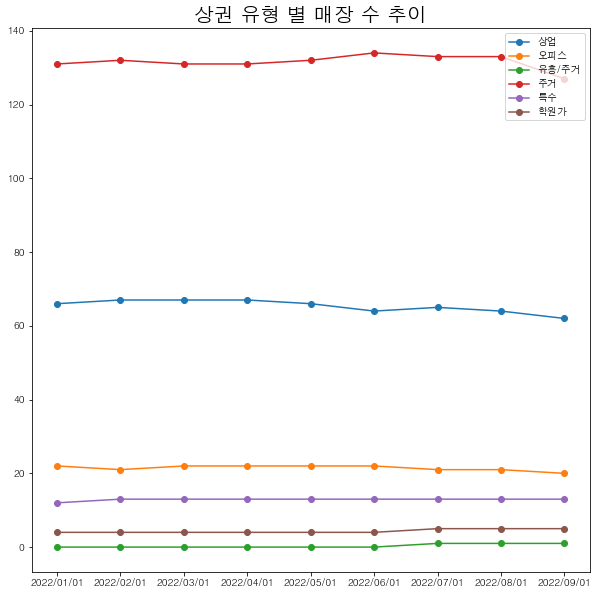

In [ ]:
xx = market_t['index']
yy1 = market_t['상업']
yy2 = market_t['오피스']
yy3 = market_t['유흥/주거']
yy4 = market_t['주거']
yy5 = market_t['특수']
yy6 = market_t['학원'] + market_t['학원가']


fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
axx = fig.add_subplot() ## 그림 뼈대(프레임) 생성

## 선그래프 생성
axx.plot(xx,yy1,marker='o',label='상업') 
axx.plot(xx,yy2,marker='o',label='오피스') 
axx.plot(xx,yy3,marker='o',label='유흥/주거')
axx.plot(xx,yy4,marker='o',label='주거')
axx.plot(xx,yy5,marker='o',label='특수')
axx.plot(xx,yy6,marker='o',label='학원가')

axx.legend() ## 범례
 
plt.title('상권 유형 별 매장 수 추이',fontsize=20) ## 타이틀 설정
plt.show()

In [ ]:
##fis랑 mis 상권 유형 분류 다름 + 분류 별 매장 개수도 다름
##총 매장 개수 자체가 fis랑 mis랑 다름


#9월 기준
print('<<<<<from fis>>>>>')
print(pd.DataFrame(fis.groupby('Unnamed: 57').size()).iloc[3:])
print('\n')
print('<<<<<from mis>>>>>')
print(pd.DataFrame(market_t.iloc[-1]).iloc[1:])

<<<<<from fis>>>>>
               0
Unnamed: 57     
상업            91
쇼핑/오피스         1
오피스           32
주거           191
주거/유흥          1
특수            19
학원             3
학원가            1


<<<<<from mis>>>>>
         8
상업      62
오피스     20
유흥/주거    1
주거     127
특수      13
학원       4
학원가      1


#################대표자 연령대 별 매장 수####################

In [ ]:

age = fis['Unnamed: 61']
age = age.fillna(0)

age40 = [] #40년도생
age50 = [] #50년도생
age60 = []
age70 = []
age80 = []
age90 = []
age_else = []
age_nan = []

for i in range(512):
    if type(age[i]) == int:
        if 40 <= age[i] < 50:
            age40.append(age[i])
        elif 50 <= age[i] < 60:
            age50.append(age[i])
        elif 60 <= age[i] < 70:
            age60.append(age[i])
        elif 70 <= age[i] < 80:
            age70.append(age[i])
        elif 80 <= age[i] < 90:
            age80.append(age[i])
        elif 90 <= age[i] <= 99:
            age90.append(age[i])
        elif age[i] == 0:
            age_nan.append(age[i])
    else:
        age_else.append(age[i])


agee = pd.DataFrame(
    {'40년대생' : [len(age40)],
    '50년대생' : [len(age50)],
    '60년대생' : [len(age60)],
    '70년대생': [len(age70)+2],
    '80년대생': [len(age80)+1],
    '90년대생' : [len(age90)]})

agee
#성별정보는 없는것같습니다.

,40년대생,50년대생,60년대생,70년대생,80년대생,90년대생
0,3,14,63,152,119,62


#################월 별 개업/폐업 매장 수####################

In [ ]:

import datetime
from datetime import date
open_close = pd.DataFrame(
    [[date(2022,1,1), 3, 8],
    [date(2022,2,1), 2, 6],
    [date(2022,3,1), 4, 2],
    [date(2022,4,1), 2, 3],
    [date(2022,5,1), 2, 5],
    [date(2022,6,1), 3, 5],
    [date(2022,7,1), 3, 3],
    [date(2022,8,1), 1, 11],
    [date(2022,9,1), 4, 3]], columns = ['날짜', '개업', '폐업'])

open_close

,날짜,개업,폐업
0,2022-01-01,3,8
1,2022-02-01,2,6
2,2022-03-01,4,2
3,2022-04-01,2,3
4,2022-05-01,2,5
5,2022-06-01,3,5
6,2022-07-01,3,3
7,2022-08-01,1,11
8,2022-09-01,4,3


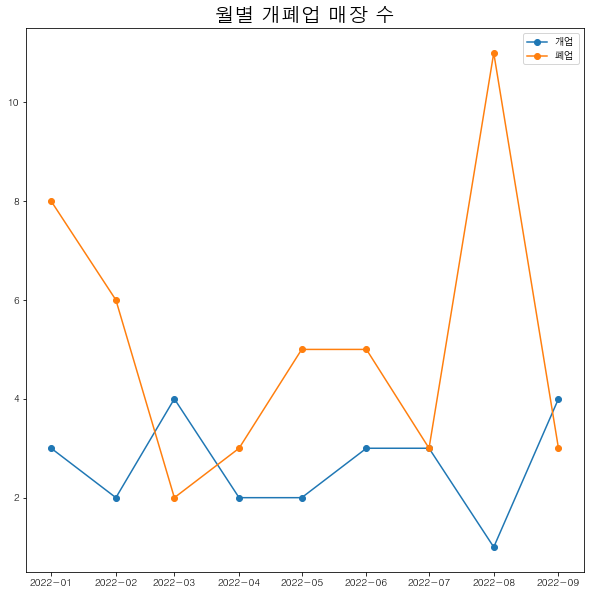

In [ ]:
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
axx = fig.add_subplot() ## 그림 뼈대(프레임) 생성

## 선그래프 생성
axx.plot(open_close['날짜'],open_close['개업'],marker='o',label='개업') 
axx.plot(open_close['날짜'],open_close['폐업'],marker='o',label='폐업') 

axx.legend() ## 범례
 
plt.title('월별 개폐업 매장 수',fontsize=20) ## 타이틀 설정
plt.show()


#################최근 1년내 매월 매출이 있는 매장 수####################

In [ ]:

sales1 = set(mis1[mis1['매출 누계'] != 0]['매장명(변경)'])
sales2 = set(mis2[mis2['매출 누계'] != 0]['매장명(변경)'])
sales3 = set(mis3[mis3['매출 누계'] != 0]['매장명(변경)'])
sales4 = set(mis4[mis4['매출 누계'] != 0]['매장명(변경)'])
sales5 = set(mis5[mis5['매출 누계'] != 0]['매장명(변경)'])
sales6 = set(mis6[mis6['매출 누계'] != 0]['매장명(변경)'])
sales7 = set(mis7[mis7['매출 누계'] != 0]['매장명(변경)'])
sales8 = set(mis8[mis8['매출 누계'] != 0]['매장명(변경)'])
sales9 = set(mis9[mis9['매출 누계'] != 0]['매장명(변경)'])

sales_all = sales1 & sales2 & sales3 & sales4 & sales5 & sales6 & sales7 &sales8&sales9
len(sales_all)

198

#################월별 흑자/적자 매장 수####################

In [ ]:
surplus = fis['Unnamed: 95']
surplus = surplus.fillna(0)

surplus_gain = [] #적자
surplus_loss = [] #흑자
surplus_else = []
surplus_nan = []

for i in range(512):
    if surplus[i] == '흑자':
        surplus_gain.append(surplus[i])
    elif surplus[i] == '적자':
        surplus_loss.append(surplus[i])
    elif surplus[i] == 0:
        surplus_nan.append(surplus[i])
    else:
        surplus_else.append(surplus[i])

surplus_gain_loss = pd.DataFrame(
    {'흑자' : [len(surplus_gain)],
    '적자' : [len(surplus_loss)]})

surplus_gain_loss

,흑자,적자
0,225,265
